In [12]:
import pandas as pd

tagates = pd.read_csv('./data/tagates_nb201_results.csv', index_col=0)
tagates['predictor'] = 'TA-GATES'
graf = pd.read_csv('./data/graf_tagates.csv')

In [13]:
graf = graf[['train_size', 'data_seed', 'fit_time', 'test_time', 'tau', 'model']].copy()
graf['predictor'] = 'ZCP + GRAF + ' + graf['model'].str.replace('xgb_tuned', 'XGB+').replace('xgb', 'XGB').replace('rf', 'RF')
graf.drop(columns='model', inplace=True)

In [16]:
graf['runtime'] = graf['fit_time'] + graf['test_time']
graf[['predictor', 'runtime']].groupby('predictor').sum()

,runtime
predictor,
ZCP + GRAF + RF,293.611885
ZCP + GRAF + XGB,51.661032
ZCP + GRAF + XGB+,2559.498281


In [22]:
tatimes = pd.read_csv('./data/tagates_times.csv')
tatimes.drop(columns='seed').groupby('train_size').sum()

,runtime
train_size,
0.01,31698.703
0.05,32524.089
0.10,34048.650
0.20,37259.116


In [18]:
graf = graf[['train_size', 'data_seed', 'tau', 'predictor']]

In [19]:
data = pd.concat([graf, tagates], axis=0).reset_index()

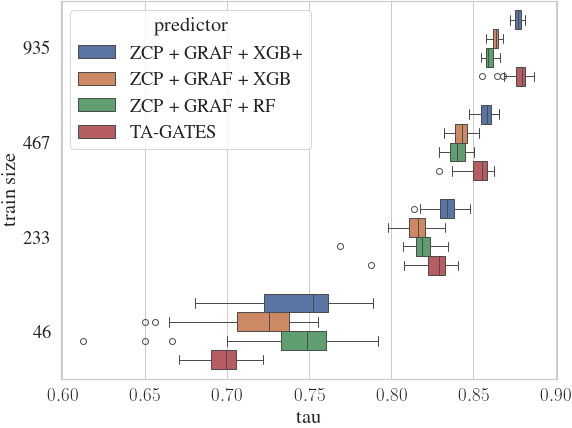

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

rc = {'text.usetex': True, 'font.family': 'serif', 'text.latex.preamble': '\\usepackage{times} ', 'figure.figsize': (3.25, 2.0086104634371584), 'figure.constrained_layout.use': True, 'figure.autolayout': False, 'savefig.bbox': 'tight', 'savefig.pad_inches': 0.015}#, 'font.size': 10, 'axes.labelsize': 10, 'legend.fontsize': 6, 'xtick.labelsize': 8, 'ytick.labelsize': 8, 'axes.titlesize': 8}
#plt.rcParams.update(rc)

sns.set(rc=rc, font_scale=1.7, style='whitegrid')#, palette=sns.color_palette()[::-1])

data['train size'] = (data['train_size'] * 4675).astype(int).astype(str)

plt.figure(figsize=(8,6))
sns.boxplot(data=data, x='tau', y='train size', hue='predictor')
plt.savefig('./data/tagates.pdf')
plt.show()